In [2]:
import pandas as pd
import numpy as  np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import yfinance as yf
import nsepy as npy
import nsetools as nse
import tensorflow as tf 
import keras.layers 

In [26]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [3]:
from sklearn.preprocessing import MinMaxScaler

In [4]:
start="2000-01-01"
end="2024-01-05"
stock ="GOOG"

data=yf.download(stock,start,end)

[*********************100%%**********************]  1 of 1 completed


In [5]:
data
df=data

In [6]:
df.shape

(4878, 6)

In [7]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512


In [8]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-28,141.850006,142.270004,140.828003,141.279999,141.279999,12192500
2023-12-29,140.679993,141.434998,139.899994,140.929993,140.929993,14872700
2024-01-02,139.600006,140.615005,137.740005,139.559998,139.559998,20071900
2024-01-03,138.600006,141.089996,138.429993,140.360001,140.360001,18974300
2024-01-04,139.850006,140.634995,138.009995,138.039993,138.039993,18253300


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4878 entries, 2004-08-19 to 2024-01-04
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4878 non-null   float64
 1   High       4878 non-null   float64
 2   Low        4878 non-null   float64
 3   Close      4878 non-null   float64
 4   Adj Close  4878 non-null   float64
 5   Volume     4878 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 266.8 KB


In [10]:
df.describe

<bound method NDFrame.describe of                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2004-08-19    2.490664    2.591785    2.390042    2.499133    2.499133   
2004-08-20    2.515820    2.716817    2.503118    2.697639    2.697639   
2004-08-23    2.758411    2.826406    2.716070    2.724787    2.724787   
2004-08-24    2.770615    2.779581    2.579581    2.611960    2.611960   
2004-08-25    2.614201    2.689918    2.587302    2.640104    2.640104   
...                ...         ...         ...         ...         ...   
2023-12-28  141.850006  142.270004  140.828003  141.279999  141.279999   
2023-12-29  140.679993  141.434998  139.899994  140.929993  140.929993   
2024-01-02  139.600006  140.615005  137.740005  139.559998  139.559998   
2024-01-03  138.600006  141.089996  138.429993  140.360001  140.360001   
2024-01-04  139.850006  140.634995  138.009995  138.039993  138.039993   

   

In [11]:
df.isna().value_counts()

Open   High   Low    Close  Adj Close  Volume
False  False  False  False  False      False     4878
dtype: int64

In [12]:
ma_100_days=df.Close.rolling(100).mean()

In [13]:
ma_100_days

Date
2004-08-19         NaN
2004-08-20         NaN
2004-08-23         NaN
2004-08-24         NaN
2004-08-25         NaN
                ...   
2023-12-28    134.7783
2023-12-29    134.8692
2024-01-02    134.9633
2024-01-03    135.0648
2024-01-04    135.1435
Name: Close, Length: 4878, dtype: float64

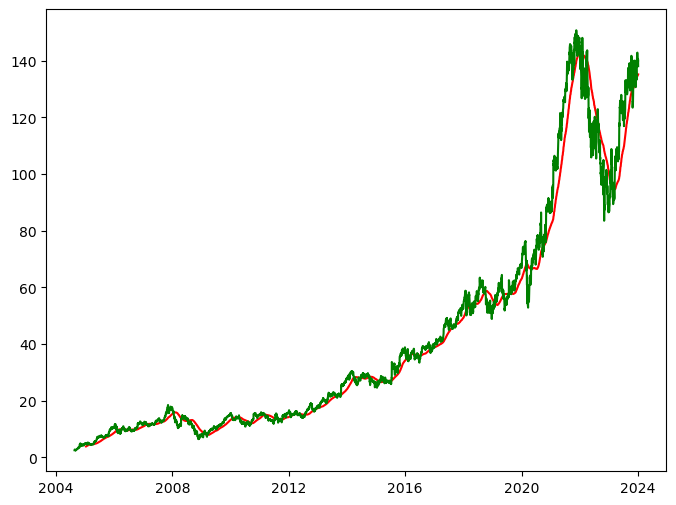

In [14]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,"r")
plt.plot(df.Close,"g")
plt.show()

In [15]:
ma_200_days=df.Close.rolling(200).mean()

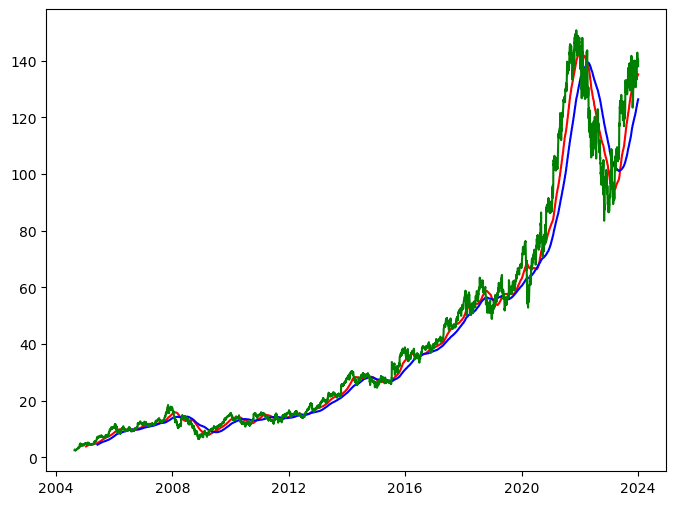

In [16]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,"r")
plt.plot(ma_200_days,"b")
plt.plot(df.Close,"g")
plt.show()

In [17]:
df.dropna(inplace=True)

In [18]:
df_train=pd.DataFrame(df.Close[0: int(len(data)*0.80)])
df_test=pd.DataFrame(df.Close[int(len(data)*0.80):len(data)])

In [19]:
df_train.shape[0]

3902

In [20]:
df_test.shape[0]

976

In [21]:
scaler=MinMaxScaler(feature_range=(0,1))

In [22]:
df_train_scale=scaler.fit_transform(df_train)

In [23]:
x=[]
y=[]
for i in range (100,df_train_scale.shape[0]):
    x.append(df_train_scale[i-100:i])
    y.append(df_train_scale[i,0])

In [27]:
x,y=np.array(x),np.array(y)

In [29]:
model=Sequential()
model.add(LSTM(units=50,activation="relu", return_sequences = True ,
                input_shape=((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation="relu", return_sequences =True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation="relu", return_sequences =True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [30]:
model.compile(optimizer="adam",loss="mean_squared_error")

In [31]:
model.fit(x,y,epochs=50,batch_size=32,verbose=1 )

Epoch 1/50
119/119 [==============================] - 15s 116ms/step - loss: 0.0157
Epoch 2/50
119/119 [==============================] - 14s 115ms/step - loss: 0.0041
Epoch 3/50
119/119 [==============================] - 13s 113ms/step - loss: 0.0042
Epoch 4/50
119/119 [==============================] - 14s 114ms/step - loss: 0.0036
Epoch 5/50
119/119 [==============================] - 13s 113ms/step - loss: 0.0030
Epoch 6/50
119/119 [==============================] - 14s 115ms/step - loss: 0.0030
Epoch 7/50
119/119 [==============================] - 13s 113ms/step - loss: 0.0028
Epoch 8/50
119/119 [==============================] - 14s 116ms/step - loss: 0.0024
Epoch 9/50
119/119 [==============================] - 13s 112ms/step - loss: 0.0024
Epoch 10/50
119/119 [==============================] - 13s 110ms/step - loss: 0.0025
Epoch 11/50
119/119 [==============================] - 13s 110ms/step - loss: 0.0024
Epoch 12/50
119/119 [==============================] - 13s 110ms/step - lo

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [34]:
pass_100_days=df_train.tail(100)


In [36]:
df_test=pd.concat([pass_100_days,df_test],ignore_index= True)

In [37]:
df_test

,Close
0,62.069500
1,61.254501
2,60.950001
3,60.255001
4,58.831501
...,...
1071,141.279999
1072,140.929993
1073,139.559998
1074,140.360001


In [40]:
df_test_scale=scaler.fit_transform(df_test)

In [43]:
x=[]
y=[]
for i in range (100,df_test_scale.shape[0]):
    x.append(df_test_scale[i-100:i])
    y.append(df_test_scale[i,0])
    
x,y=np.array(x),np.array(y)

In [44]:
y_predict=model.predict(x)

31/31 [==============================] - 1s 29ms/step


In [46]:
scaler.scale_

array([0.0102168])

In [51]:
scale=1/scaler.scale_

In [52]:
print("Prediction score is ",scale)

Prediction score is  [97.87799835]


In [53]:
y_predict=y_predict*scale

In [54]:
y=y*scale

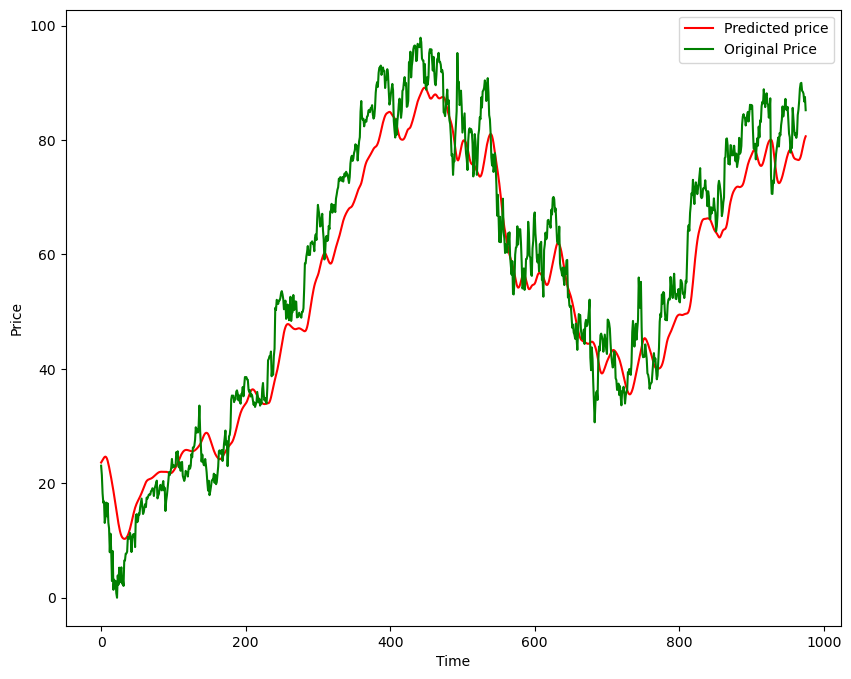

In [56]:
plt.figure(figsize=(10,8))
plt.plot(y_predict,"r",label="Predicted price")
plt.plot(y,"g",label="Original Price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

In [60]:
model.save("Stock Prediction using LSTM.keras")